
# Boxplots

## Student ID G00219132
    
This notebook is a submission for Project 2018 for the Module **Fundamentals of Data Analysis** The module is delivered as part of the [Higher Diploma in Data Analytics](https://www.gmit.ie/computing/higher-diploma-science-computing-data-analytics-ict-skills) in [Galway Mayo IT](https://www.gmit.ie/), Galway.

### problem statement outline
Below is an extract from the project instructions.

**Problem statement**

The box plot is common in data analysis for investigating individual numerical variables.
In this project, you will investigate and explain box plots and their uses. The boxplot
function from the Python package matplotlib.pyplot can be used to create box plots.
Your submission should be in the form of a repository containing a Jupyter notebook in
which you detail your findings. 

In your notebook, you should:
* Summarise the history of the box plot and situations in which it used.
* Demonstrate the use of the box plot using data of your choosing.
* Explain any relevant terminology such as the terms quartile and percentile.
* Compare the box plot to alternatives.

### notebook structure
The notebook is split up into the following sections

* Section One - General setup and importatation of necessary python libraries/packages
* Section Two - Summarise the history of the box plot and situations in which it is used.
* Section Three - Demonstrate the use of the box plot using data of your choosing.
* Section Four - Explain any relevant terminology such as the terms quartile and percentile.
* Section Five - Compare the box plot to alternatives.
* Section Six - references and conclusion

### Section one - general set up
programming language - Python 3.7.0.for some information about Python and it's uses see the wikipedia page, [Python](https://en.wikipedia.org/wiki/Python_(programming_language))

python packages imported for use in this notebook:
* Mathplotlib.pyplot.py [Mathplotlib.org](https://matplotlib.org)
* NumPy [NumPy](http://www.numpy.org/)
* Seaborn [Seaborn](https://seaborn.pydata.org)
* Pandas [Pandas](https://pandas.pydata.org)


In [1]:
#ensures plots display crrectly
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import pandas as pd

### Section Two - Summarise the history of the box plot and situations in which it is used.

Boxplots were first used in 1969 by mathematician [John Tukey](https://en.wikipedia.org/wiki/John_Tukey). 
They are used to show the distribution of data and show the data minimum, first quartile, median, third quartile and maximum.
They consist of a rectangular box with whiskers extending from each end to the mimimum and maximum data points. The rectangle itself goes from the first quartile to the third quartile (called the interquartile range) and a ine within the box shows the median value of the data. It allows a simple but highly visually effective method of displaying and comparing data distributions. 


### Section Three - Demonstrate the use of the box plot using data of your choosing.

For this I decided to use a simple example based on CAO points. 

Each year Irish Students undergo a state examination called the Leaving Certificate, see a wikipedia page about the examimaion here, [Leaving Cert](https://en.wikipedia.org/wiki/Leaving_Certificate_(Ireland)). For these LC students entry to third level courses in Ireland is via a central application system [CAO](http://www.cao.ie/). 

Leaving cert results are converted to **applicant points** and Third Level institutions review applicant points & available courses places and determine the mimimum entry points for the course. Course are then allocated to eligible applicants based on their points, in descending order until the course places are all allocated. The **course points** will therefore be the total points obtained by the last applicant allocated a course place.

This method means that course popularity and number of available places can result in points changing from year to year. 

In the simulated example below a course had a points requirement in 2016 of 365 with a max points of 530, in 2017 a points requirement of 397 with maz 495. Intake is unchanged with 38 offers made in each year. When plotted as boxplots it is apparent that whilst the overall spread of points and max were greater in 2016 the 2017 median was higher.
It is demonstrating in 2016 the two common scenarios in CAO points, at the higher end you have a student who has an excess of points but has stuck with the course they want; at the lower end the scenario where the demand was not as hgh as expected and to fill and make the course viable it is decided to drop points and pull in the last few students in a second round of offers. 




In [29]:
##df = pd.read_csv("mock up points.csv", header =0)
df = pd.read_csv("https://raw.githubusercontent.com/Hudsonsue/BOXPLOTS/master/mock%20up%20points.csv", header =0)
#df

In [9]:
df.describe()

,201600,201700
count,39.000000,39.000000
mean,427.076923,440.871795
std,41.050921,30.051867
min,365.000000,397.000000
25%,398.500000,416.500000
50%,419.000000,434.000000
75%,452.500000,465.000000
max,530.000000,497.000000


Median Values   [419. 434.]
Max Pts
201600    530
201700    497
dtype: int64
Min pts
201600    365
201700    397
dtype: int64

Q1 201600 398.5 --- Q1 201700 416.5

Q3 201600 452.5 --- Q3 201700 465.0

Interquartile range 201600 54.0
Interquartile range 201700 48.5


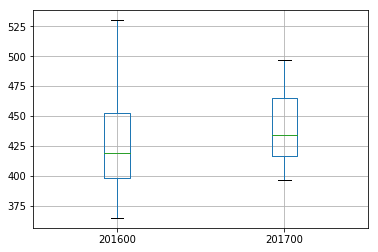

In [10]:
boxplot = df.boxplot(column=['201600','201700'],  return_type='axes')
print("Median Values  ", np.median(df,axis =0))
max_pts = np.amax(df, axis=0)
min_pts = np.amin(df, axis=0)
print("Max Pts")
print (max_pts)
print("Min pts")
print( min_pts)
print()
Q1 =np.percentile(df, 25, axis =0)
print ("Q1 201600", Q1[0], "--- Q1 201700", Q1[1])
print()
Q3 =np.percentile(df, 75, axis=0)
print ("Q3 201600", Q3[0], "--- Q3 201700", Q3[1])
IR = Q3-Q1
print()
print("Interquartile range 201600", (IR[0]))
print("Interquartile range 201700", (IR[1]))


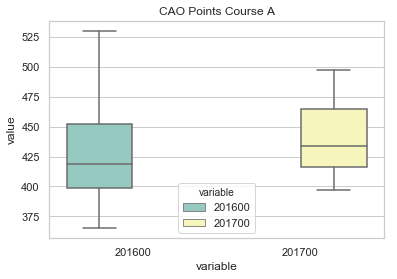

In [11]:

df1 = pd.DataFrame(data = df, columns = ['201600','201700'])
sns.set(style="whitegrid")
sns.boxplot(x="variable",y = "value", hue = "variable",data=pd.melt(df), palette="Set3").set_title("CAO Points Course A")
plt.show()


    #palette="Set3" colour scheme

In [12]:
df3 = pd.read_csv("boxplotdata.csv",  header = 0) 
df3.head(3)

,PROGRAMME,2012,2013,2014,2015,2016,2017
0,prog A,410,440,455,455,475,455
1,prog A,415,440,460,460,480,460
2,prog A,425,450,465,465,485,465


In [ ]:
df3.boxplot(column = ['2012','2013','2014','2015','2016','2017'], return_type='axes', by='PROGRAMME')
plt.show()



    2012  2013  2014  2015  2016  2017
0    410   440   455   455   475   455
1    415   440   460   460   480   460
2    425   450   465   465   485   465
3    430   455   470   470   490   466
4    440   460   475   480   500   471
5    445   465   480   485   505   476
6    455   470   485   490   515   486
7    460   475   495   505   520   487
8    465   485   505   515   525   493
9    470   490   510   520   530   497
10   485   495   515   530   540   508
11   490   505   520   535   545   515
12   495   510   535   540   555   518
13   515   515   550   545   565   520
14   535   520   555   545   570   531
15   565   525   580   550   575   537
16   575   590   595   550   575   514
17   285   230   185   215   285   305
18   290   235   200   220   285   310
19   300   265   220   225   285   314
20   300   270   250   250   315   319
21   310   275   265   265   330   329
22   310   285   275   282   340   348
23   310   295   285   290   390   371
24   310   298   290   30

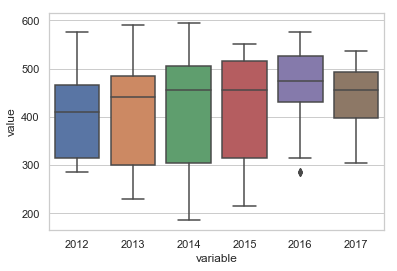

In [13]:
df4 = pd.DataFrame(data = df3, columns = [ '2012','2013', '2014', '2015','2016','2017'] )
print(df4)
sns.boxplot(x="variable", y="value", data= pd.melt(df4))
plt.show()


### Section Four - Explain any relevant terminology such as the terms quartile and percentile.

### Compare the box plot to alternatives.

As boxplots are distribution plots the first alternative to spring to mind is the histogram, below I have plotted the single programme across two years data as seaborn [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html), both superimposed and side by side.
Whilst it is possible to interpret the plots it is not as visually easy as the box plots, this would be even more apparent where there are six years of data!

I also investigated the use of a [strip plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html), it shows the distribution of datapoints and it would be useful in conjunction with the box plots. Doing these comparisons higlighted one major advantage of the boxplot which is that whilst it is lovely in colour colour is not a necessity! unlike most plots!

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


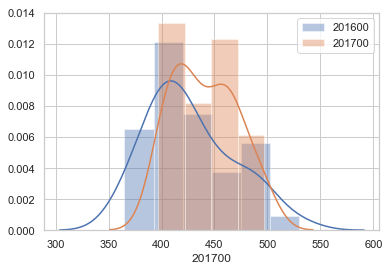

In [14]:
df
sns.distplot(df["201600"], label="201600")
sns.distplot(df["201700"], label="201700")
plt.legend()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


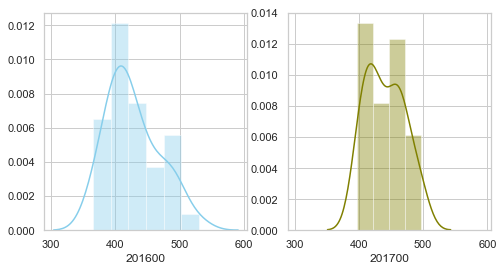

In [30]:
# plot
f, axes = plt.subplots(1,2, figsize=(8, 4), sharex=True)
sns.distplot( df["201600"] , color="skyblue", ax=axes[0])
sns.distplot( df["201700"] , color="olive", ax=axes[1])


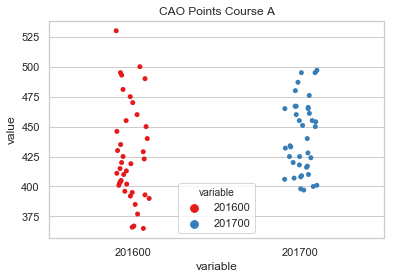

In [16]:

df1 = pd.DataFrame(data = df, columns = ['201600','201700'])
sns.set(style="whitegrid")
sns.stripplot(x="variable",y = "value", hue = "variable",data=pd.melt(df), palette="Set1").set_title("CAO Points Course A")
plt.show()


### Section Six - references and conclusion

references specific
https://en.wikipedia.org/wiki/Box_plot

https://www.tutorialspoint.com/python/python_box_plots.htm

https://www.mathsisfun.com/data/quartiles.html --reminder of how to work out quartiles!

https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn --assistance with SNS box plot

### END